**Signals and System: Continious time Signals**

The complex exponential is defined as
\begin{equation}
x(t) = e^{s t}
\end{equation}

where $s = \sigma + j \omega$ denotes the complex frequency with $\sigma, \omega \in \mathbb{R}$ and $j$ the imaginary unit $(j^2=-1)$.

\begin{equation}
x(t) = e^{(\sigma + j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
\end{equation}

The real/imaginary part of the exponential signal is given by a weighted cosine/sine with angular frequency $\omega = 2 \pi f$. For $t>0$, the time-dependent weight $e^{\sigma t}$ is

* exponentially decaying over time for $\sigma < 0$,
* constantly one for $\sigma = 0$,
* exponentially growing over time for $\sigma > 0$, and vice-versa for $t<0$.

The Python module [SymPy](http://docs.sympy.org/latest/index.html) is used for this purpose. It provides functionality for symbolic variables and functions, as well as their calculus. The required symbolic variables need to be defined explicitly before usage. The $t$, $\omega$ and $\sigma$ are defined as real-valued symbolic variables.

In [39]:
import sympy as sym
t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

 t⋅(1.0⋅ⅈ⋅ω + σ)
ℯ               

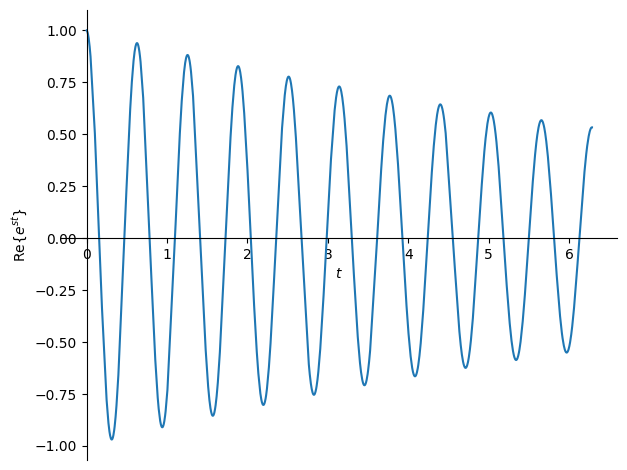

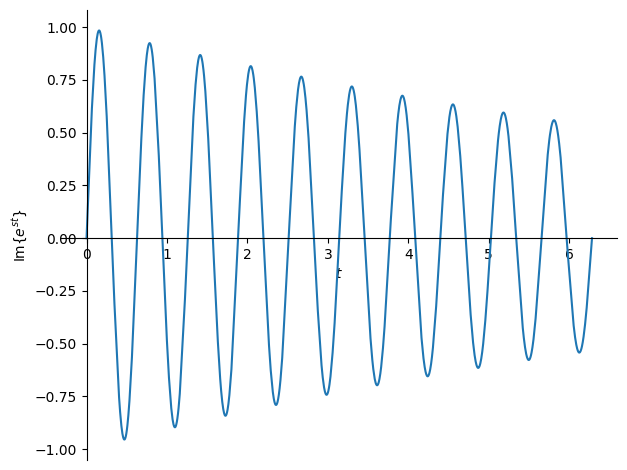

In [40]:
y = x.subs({omega: 10, sigma: -.1})

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}')
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}');

The Dirac impulse is one of the most important signals in the theory of signals and systems. It is used for the characterization of LTI systems and the modeling of impulse-like signals. Some properties of Dirac impulse are as follows:


1. **Sifting property**
    \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) = x(0)
    \end{equation}
    where $x(t)$ needs to be differentiable at $t=0$. The sifting property implies $\int_{-\infty}^{\infty} \delta(t) = 1$.
    
2. **Multiplication**
    \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    where $x(t)$ needs to be differentiable at $t=0$.
    
3. **Linearity**
    \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
4. **Scaling**
    \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}
    where $a \in \mathbb{R} \setminus 0$. This implies that the Dirac impulse is a function with even symmetry.
    
5. **Derivation**
    \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

6. **Convolution**
    
    Generalization of the sifting property yields
    \begin{equation}
    \int_{-\infty}^{\infty} \delta(\tau) \cdot x(t - \tau)  \, d\tau = x(t)
    \end{equation}

It is important to note that the product $\delta(t) \cdot \delta(t)$ of two Dirac impulses is not defined.

In [41]:
delta = sym.DiracDelta(t)
delta

δ(t)

In [42]:
f = sym.Function('f')(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo))

f(0)

Derive the sifting property for a shifted Dirac impulse $\delta(t-\tau)$

In [43]:
f = sym.Function('f')(t)
tau=1
x=delta
y = x.subs(t, t-tau)
sym.integrate(y*f, (t, -sym.oo, sym.oo))

f(1)

The Heaviside signal is defined as follows:

\begin{equation}
u(t) = \begin{cases} 0 & t<0 \\  \frac{1}{2} & t=0 \\ 1 & t > 0 \end{cases}
\end{equation}

The Heaviside signal may be used to represent a signal that switches on at a specified time and stays switched on indefinitely. The Heaviside signal can be related to the Dirac impulse by

\begin{equation}
u(t) = \int_{-\infty}^{t} \delta(\tau) \; d\tau
\end{equation}

In [44]:
step = sym.Heaviside(t)
step

θ(t)

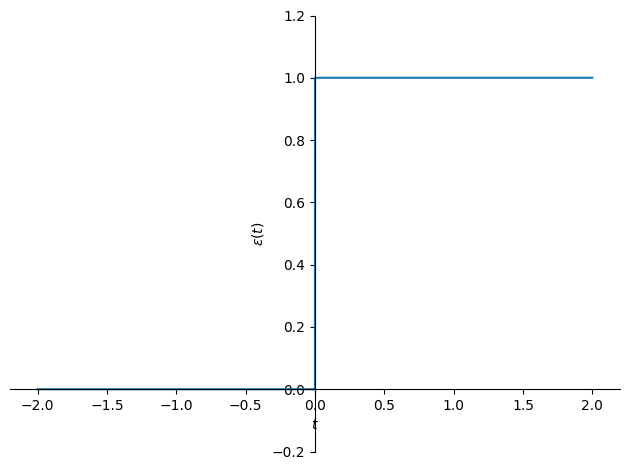

In [45]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

*Let*'s construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=0$. Considering the definition of the Heaviside function, the desired signal is given as

\begin{equation}
x(t) = \cos(\omega t) \cdot u(t)
\end{equation}

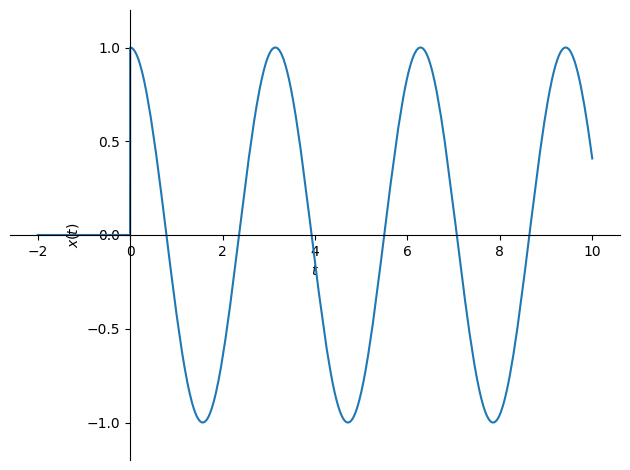

In [46]:
x = sym.cos(omega*t) * sym.Heaviside(t)
sym.plot(x.subs(omega, 2), (t, -2, 10), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

The sign signal or signum function is defined as follows:

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases}
\end{equation}

The sign signal is useful to represent the absolute value of a real-valued signal $x(t) \in \mathbb{R}$ by a multiplication

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t))
\end{equation}

It is related to the Heaviside signal by

\begin{equation}
\text{sgn}(t) = 2 \cdot u(t) - 1
\end{equation}

when following above definition with $u(0)=\frac{1}{2}$.

In [47]:
sgn = sym.sign(t)
sgn

sign(t)

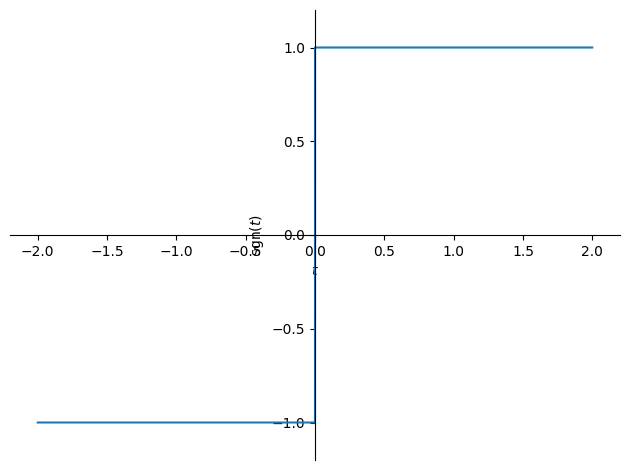

In [48]:
sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');

The rectangular signal is defined as follows:

\begin{equation}
\text{rect}(t) = \begin{cases} 1 & |t| < \frac{1}{2} \\ \frac{1}{2} & |t| = \frac{1}{2} \\ 0 & |t| > \frac{1}{2} \end{cases}
\end{equation}

Its time limits and amplitude are chosen such that the area under the function is $1$.

The rectangular signal is used to represent a signal which has finite duration, respectively is switched on for a limited period of time. The rectangular signal can be related to the Heaviside signal by
\begin{equation}
\text{rect}(t) = u \left(t + \frac{1}{2} \right) - u \left(t - \frac{1}{2} \right)
\end{equation}

In [49]:
class rect(sym.Function):
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

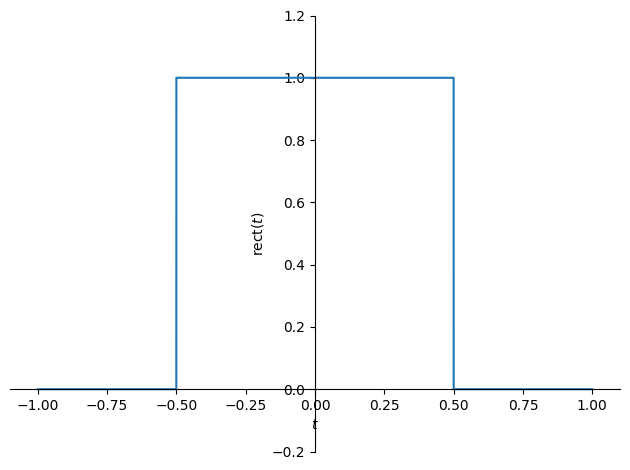

In [50]:
sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');

### Superposition Operation

The weighted superposition $x(t)$ of two signals $x_\text{A}(t)$ and $x_\text{B}(t)$ is given as

\begin{equation}
x(t) = A \cdot x_\text{A}(t) + B \cdot x_\text{B}(t)
\end{equation}

with the complex weights $A, B \in \mathbb{C}$. Let's consider two harmonic signals $x_\text{A}(t) = A \cdot \cos(\omega_\text{A} t)$ and  $x_\text{B}(t) = B \cdot \cos(\omega_\text{B} t)$ with weights $A$, $B$ and angular frequencies $\omega_\text{A}$ and $\omega_\text{B}$.

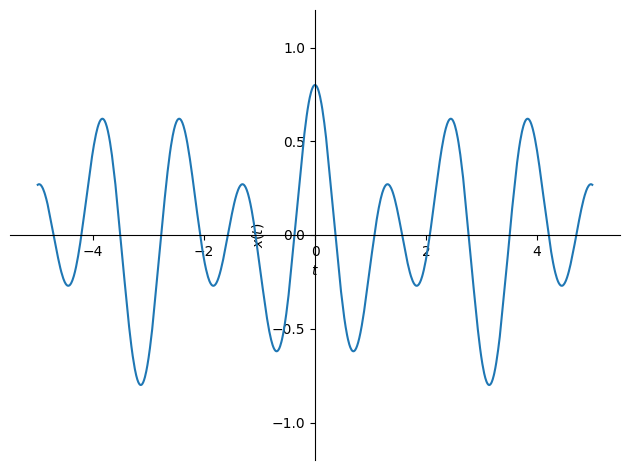

In [51]:
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)

A = .3
omA = 3
B = .5
omB = 5

x = A*sym.cos(omA*t) + B*sym.cos(omB*t)

sym.plot(x, (t, -5, 5), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

### Time Shift operation

The time shift of a signal $x(t)$ by the time $\tau$ is a frequently applied operation in signal processing. For instance, to model the propagation of signals from an actuator to a sensor.

The temporally shifted signal $x(t)$ is defined as

\begin{equation}
y(t) = x(t-\tau)
\end{equation}
with $\tau \in \mathbb{R}$. The signal $x(t)$ is

* shifted to the right (*delayed*) for $\tau > 0$
* shifted to the left (*advanced*) for $\tau < 0$

Let's consider an example as \begin{equation}
x(t) = \text{rect}\left(t - \frac{1}{2} \right) + \frac{2}{3} \cdot \text{rect}\left(t-\frac{3}{2} \right) + \frac{1}{3} \cdot \text{rect} \left(t-\frac{5}{2} \right)
\end{equation}

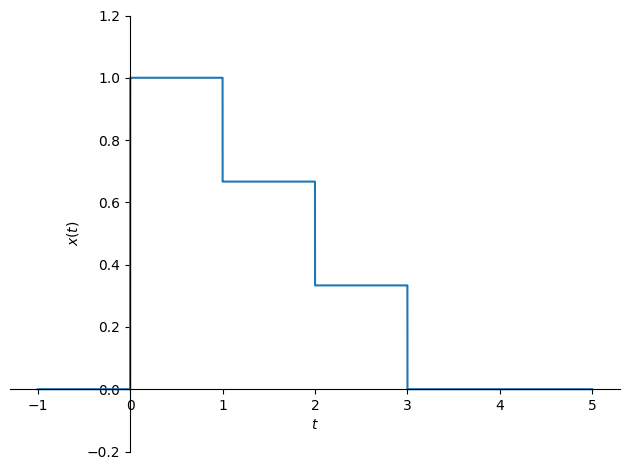

In [52]:
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)

sym.plot(x, (t, -1, 5), ylim=[-0.2, 1.2], ylabel='$x(t)$');

### Temporal (Time) Scaling

The temporal scaling of a signal $x(t)$ is defined as

\begin{equation}
y(t) = x(a \cdot t)
\end{equation}

with $a \in \mathbb{R}$. The signal $x(t)$ is

* stretched for $0 < a < 1$
* compressed for $a > 1$
* time-reversed and scaled for $a < 0$

Application is the upsampling and downsampling of signals

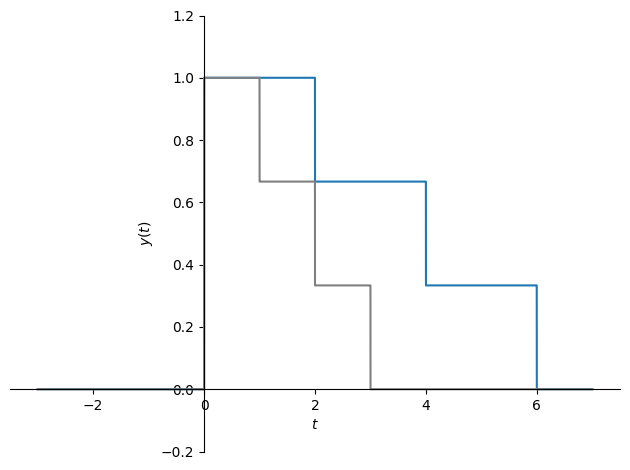

In [53]:
a = 1/2
y = x.subs(t, a*t)


px = sym.plot(x, (t, -3, 7), ylim=[-0.2, 1.2],
              ylabel=r'$x(t)$', show=False, line_color='gray')
py = sym.plot(y, (t, -3, 7),
              ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
py.extend(px)
py.show()

**Temporal (time) flipping or folding**

The temporal flipping of a signal $x(t)$ is defined as

\begin{equation}
y(t) = x(\tau - t)
\end{equation}

for $\tau \in \mathbb{R}$. As $x(\tau - t) = x(- (t - \tau))$ the flipping operation can also be represented as a time-reversal of the signal $x(t)$ followed by a shift of $\tau$ of the reversed signal. For $\tau = 0$ this results in only a time-reversal of the signal.

The temporal flipping operation can be interpreted geometrically as a mirroring of the signal $x(t)$ at the vertical axis $t=\frac{\tau}{2}$.

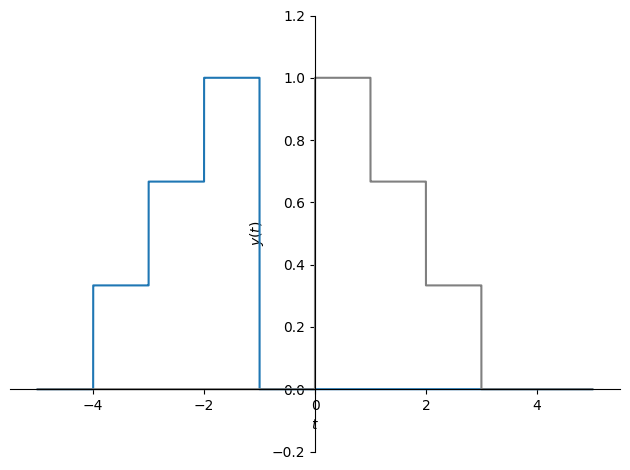

In [54]:
tau = -1
y = x.subs(t, tau - t)

px = sym.plot(x, (t, -5, 5), ylim=[-0.2, 1.2],
              ylabel=r'$x(t)$', show=False, line_color='gray')
py = sym.plot(y, (t, -5, 5), ylim=[-0.2, 1.2], ylabel=r'$y(t)$', show=False)
py.extend(px)
py.show()